# Eksplorasi Data

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

# panggil data
df = pd.read_csv("SuperStore_Orders.csv", encoding='ISO-8859-1')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def eksplorasi_numerik(df, kolom_list):
    for kolom in kolom_list:
        print(f"\n--- Statistik Deskriptif untuk: {kolom} ---")
        print(df[kolom].describe())
        print("\nJumlah nilai unik:", df[kolom].nunique())
        print("Nilai unik (jika < 20):", df[kolom].unique()[:20])
        
        # Histogram
        plt.figure(figsize=(6,4))
        df[kolom].hist(bins=20)
        plt.title(f'Distribusi Nilai: {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [3]:
# Konversi kolom numerik ke tipe float
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')
df['shipping_cost'] = pd.to_numeric(df['shipping_cost'], errors='coerce')


--- Statistik Deskriptif untuk: discount ---
count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: discount, dtype: float64

Jumlah nilai unik: 27
Nilai unik (jika < 20): [0.    0.1   0.5   0.4   0.45  0.55  0.47  0.002 0.6   0.2   0.8   0.17
 0.25  0.7   0.402 0.35  0.27  0.15  0.37  0.65 ]


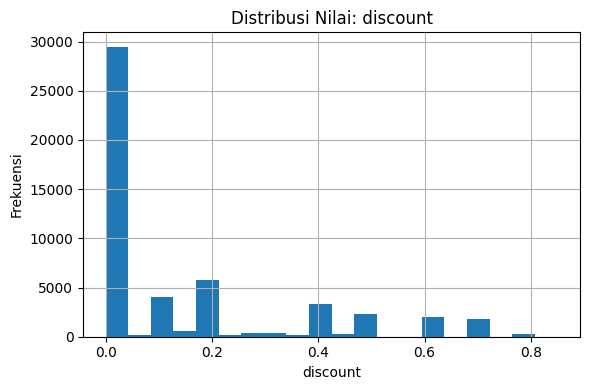


--- Statistik Deskriptif untuk: sales ---
count    48660.000000
mean       161.017838
std        201.092519
min          0.000000
25%         29.000000
50%         77.000000
75%        208.000000
max        999.000000
Name: sales, dtype: float64

Jumlah nilai unik: 993
Nilai unik (jika < 20): [408. 120.  66.  45. 114.  55. 314. 276. 912. 667. 338. 211. 854. 193.
 159. 195. 123.  69. 135.  36.]


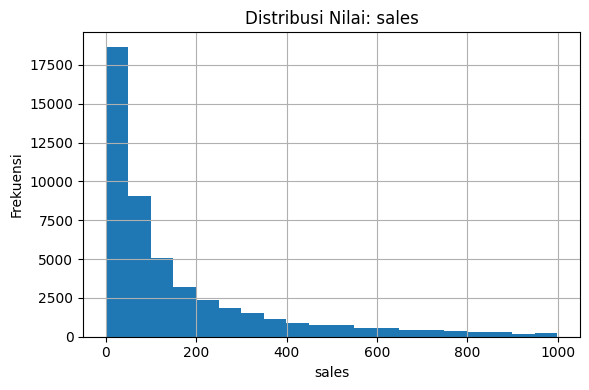


--- Statistik Deskriptif untuk: quantity ---
count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: quantity, dtype: float64

Jumlah nilai unik: 14
Nilai unik (jika < 20): [ 2  3  4  5  1  7  6  8  9 10 11 12 14 13]


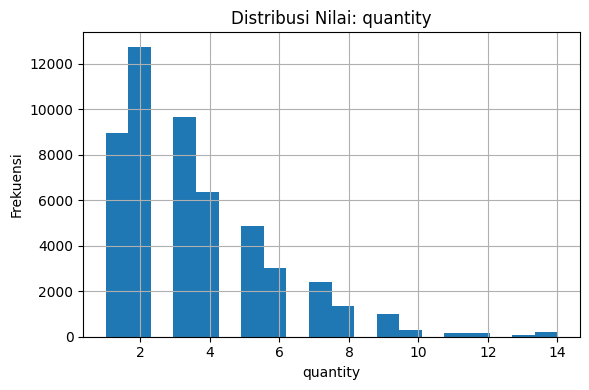


--- Statistik Deskriptif untuk: shipping_cost ---
count    51290.000000
mean        26.375915
std         57.296804
min          0.000000
25%          2.610000
50%          7.790000
75%         24.450000
max        933.570000
Name: shipping_cost, dtype: float64

Jumlah nilai unik: 10037
Nilai unik (jika < 20): [ 35.46   9.72   8.17   4.82   4.7    1.8   24.1  125.32 107.1   81.26
  33.75  21.32  12.56  10.4   10.07   8.43   8.41   8.34   7.74   7.46]


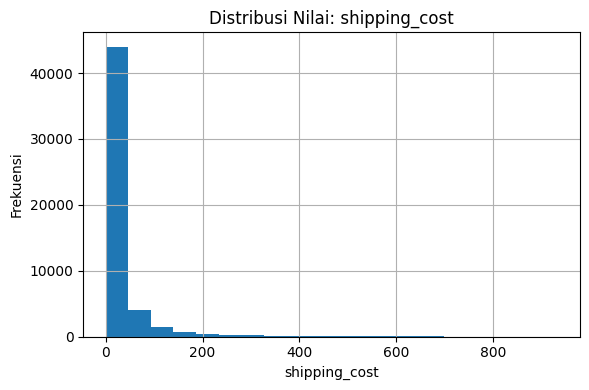

In [4]:
# Kolom-kolom yang ingin dianalisis
kolom_numerik = ['discount', 'sales', 'quantity', 'shipping_cost']

# Panggil fungsi
eksplorasi_numerik(df, kolom_numerik)

In [5]:
# mengelompokkan variabel numerik menjadi interval berdasarkan quantil

# mengelompokkan discount menjadi interval dengan bins
bins = [0, 0.35, 0.65, 1.0]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['discount_interval'] = pd.cut(df['discount'], bins=bins, labels=labels, include_lowest=True)

# Mengelompokkan sales dan quantity menjadi interval berdasarkan quanti
df['sales_interval'] = pd.qcut(df['sales'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
df['quantity_interval'] = pd.qcut(df['quantity'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])
df['shippingcost_interval'] = pd.qcut(df['shipping_cost'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,quantity,discount,profit,shipping_cost,order_priority,year,discount_interval,sales_interval,quantity_interval,shippingcost_interval
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,2,0.0,106.1400,35.46,Medium,2011,Rendah,Sangat Tinggi,Rendah,Sangat Tinggi
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,3,0.1,36.0360,9.72,Medium,2011,Rendah,Tinggi,Sedang,Tinggi
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,4,0.0,29.6400,8.17,High,2011,Rendah,Sedang,Sedang,Tinggi
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,3,0.5,-26.0550,4.82,High,2011,Sedang,Sedang,Sedang,Sedang
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,5,0.1,37.7700,4.70,Medium,2011,Rendah,Tinggi,Tinggi,Sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,2,0.2,4.5188,0.89,Medium,2014,Rendah,Rendah,Rendah,Rendah
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,1,0.0,0.4200,0.49,Medium,2014,Rendah,Rendah,Rendah,Rendah
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,3,0.0,12.3600,0.35,Medium,2014,Rendah,Rendah,Sedang,Rendah
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,1,0.0,0.5600,0.20,Medium,2014,Rendah,Rendah,Rendah,Rendah


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Sales

### Chi Squared

In [7]:
# Fungsi lengkap dengan nilai Chi-Square hitung dan tabel
def chi_square_full(col1, col2, df, alpha=0.05):
    # Buat tabel kontingensi
    ct = pd.crosstab(df[col1], df[col2])

    # Uji Chi-Square
    chi2_stat, p_val, dof, expected = chi2_contingency(ct)
    chi2_critical = chi2.ppf(1 - alpha, df=dof)

    # Cetak hasil
    print(f"\n======= {col1} vs {col2} =======")
    print("Contingency Table:")
    print(ct)
    print(f"\nChi-Squared Hitung : {chi2_stat:.4f}")
    print(f"Chi-Squared Tabel  : {chi2_critical:.4f} (α = {alpha}, df = {dof})")
    print(f"p-value            : {p_val:.4f}")

    if chi2_stat > chi2_critical:
        print("❗ Tolak H0 → Ada hubungan signifikan antara variabel.")
    else:
        print("✅ Gagal Tolak H0 → Tidak cukup bukti ada hubungan.")

    return ct, chi2_stat, chi2_critical, p_val

# List variabel target yang ingin diuji terhadap 'sales'
target_columns = [
    'ship_mode',
    'segment',
    'region',
    'category',
    'discount_interval',
    'order_priority',
    'quantity_interval',
    'shippingcost_interval'
]

# Looping seluruh uji
for col in target_columns:
    chi_square_full('sales_interval', col, df)



======= sales_interval vs ship_mode =======
Contingency Table:
ship_mode       First Class  Same Day  Second Class  Standard Class
sales_interval                                                     
Rendah                 1766       659          2511            7370
Sedang                 1820       645          2420            7245
Tinggi                 1814       646          2401            7235
Sangat Tinggi          1721       598          2457            7352

Chi-Squared Hitung : 9.6727
Chi-Squared Tabel  : 16.9190 (α = 0.05, df = 9)
p-value            : 0.3776
✅ Gagal Tolak H0 → Tidak cukup bukti ada hubungan.

======= sales_interval vs segment =======
Contingency Table:
segment         Consumer  Corporate  Home Office
sales_interval                                  
Rendah              6372       3679         2255
Sedang              6277       3628         2225
Tinggi              6260       3641         2195
Sangat Tinggi       6276       3681         2171

Chi-Squared Hit

###  Machine Learning

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

# panggil data
df = pd.read_csv("SuperStore_Orders.csv", encoding='ISO-8859-1')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Hapus koma dan ubah ke float untuk kolom sales
df['sales'] = df['sales'].str.replace(',', '').astype(float)
df['sales_interval'] = pd.qcut(df['sales'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# Fitur kategorik saja (tanpa 'sales')
fitur_kategorik = ['region', 'category', 'segment', 'order_priority', 'ship_mode']

# Fitur numerik
fitur_numerik = ['discount', 'quantity', 'shipping_cost']

# Target
target = 'sales_interval'

# One-hot encoding untuk fitur kategorik
X_kategorik = pd.get_dummies(df[fitur_kategorik], drop_first=True)

# Gabungkan dengan fitur numerik
X_encoded = pd.concat([X_kategorik, df[fitur_numerik]], axis=1)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df[target])

# Tangani missing values jika ada
X_encoded = X_encoded.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)



In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [32]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')

    print(f"\n{name}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"F1 Macro   : {f1_macro:.4f}")
    print(classification_report(y_test, y_pred))

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Macro': f1_macro
    })

# Buat dataframe hasil evaluasi
df_results = pd.DataFrame(results).sort_values(by='F1 Macro', ascending=False)
print("\n=== Ringkasan Hasil ===")
print(df_results)



Logistic Regression
Accuracy   : 0.7939
F1 Macro   : 0.7939
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2619
           1       0.92      0.83      0.87      2562
           2       0.70      0.72      0.71      2524
           3       0.73      0.74      0.74      2553

    accuracy                           0.79     10258
   macro avg       0.80      0.79      0.79     10258
weighted avg       0.80      0.79      0.79     10258


Decision Tree
Accuracy   : 0.7159
F1 Macro   : 0.7151
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2619
           1       0.82      0.82      0.82      2562
           2       0.61      0.61      0.61      2524
           3       0.61      0.62      0.62      2553

    accuracy                           0.72     10258
   macro avg       0.72      0.71      0.72     10258
weighted avg       0.72      0.72      0.72     10258


Random Forest

c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
Accuracy   : 0.8004
F1 Macro   : 0.8002
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2619
           1       0.91      0.84      0.87      2562
           2       0.71      0.73      0.72      2524
           3       0.74      0.74      0.74      2553

    accuracy                           0.80     10258
   macro avg       0.80      0.80      0.80     10258
weighted avg       0.80      0.80      0.80     10258


=== Ringkasan Hasil ===
                 Model  Accuracy  F1 Macro
3              XGBoost  0.800351  0.800182
0  Logistic Regression  0.793917  0.793916
2        Random Forest  0.767109  0.767261
1        Decision Tree  0.715929  0.715137


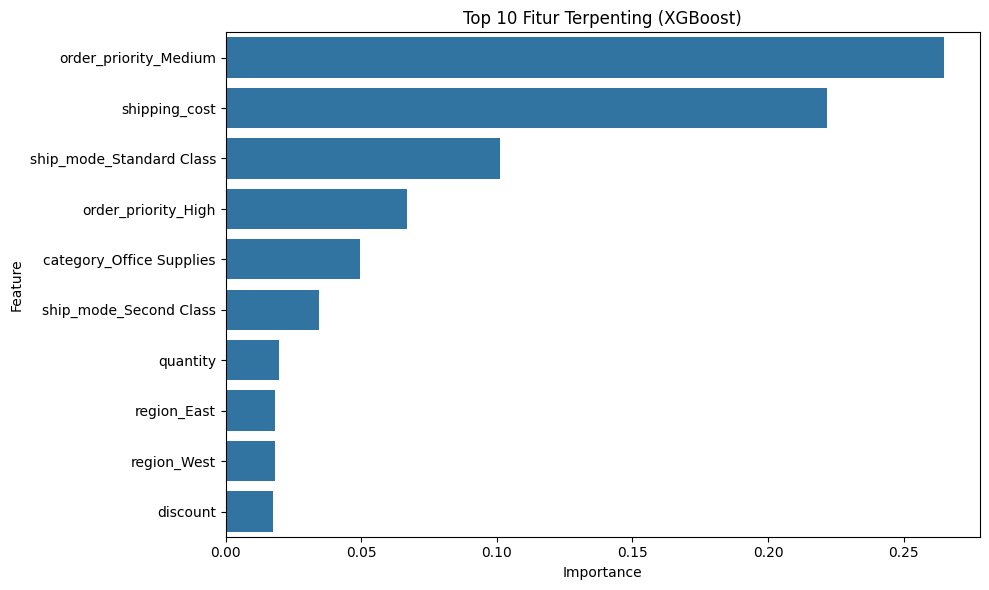

In [35]:
# Ambil model XGBoost yang sudah dilatih
xgb_model = models['XGBoost']

# Ambil kembali importance dan nama fitur
importances = xgb_model.feature_importances_
feature_names = X_train.columns  # Ini penting! Harus dari X_train

# Pastikan panjang sama
assert len(importances) == len(feature_names), "Panjang fitur dan importance tidak sama!"

# Buat dataframe dan visualisasi
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature')
plt.title('Top 10 Fitur Terpenting (XGBoost)')
plt.tight_layout()
plt.show()


In [36]:
feat_imp

,Feature,Importance
18,order_priority_Medium,0.264941
24,shipping_cost,0.221759
21,ship_mode_Standard Class,0.101055
16,order_priority_High,0.066941
12,category_Office Supplies,0.049440
20,ship_mode_Second Class,0.034444
23,quantity,0.019790
5,region_East,0.018166
11,region_West,0.018116
22,discount,0.017478


## Shipping Cost

### Chi Squared

In [39]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

# panggil data
df = pd.read_csv("SuperStore_Orders.csv", encoding='ISO-8859-1')

# Hapus koma dan ubah ke float
df['sales'] = df['sales'].str.replace(',', '').astype(float)

# mengelompokkan variabel numerik menjadi interval berdasarkan quantil

# mengelompokkan discount menjadi interval dengan bins
bins = [0, 0.35, 0.65, 1.0]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['discount_interval'] = pd.cut(df['discount'], bins=bins, labels=labels, include_lowest=True)

# Mengelompokkan sales dan quantity menjadi interval berdasarkan quanti
df['sales_interval'] = pd.qcut(df['sales'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
df['quantity_interval'] = pd.qcut(df['quantity'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])
df['shippingcost_interval'] = pd.qcut(df['shipping_cost'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,quantity,discount,profit,shipping_cost,order_priority,year,discount_interval,sales_interval,quantity_interval,shippingcost_interval
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,2,0.0,106.1400,35.46,Medium,2011,Rendah,Sangat Tinggi,Rendah,Sangat Tinggi
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,3,0.1,36.0360,9.72,Medium,2011,Rendah,Tinggi,Sedang,Tinggi
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,4,0.0,29.6400,8.17,High,2011,Rendah,Sedang,Sedang,Tinggi
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,3,0.5,-26.0550,4.82,High,2011,Sedang,Sedang,Sedang,Sedang
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,5,0.1,37.7700,4.70,Medium,2011,Rendah,Tinggi,Tinggi,Sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,2,0.2,4.5188,0.89,Medium,2014,Rendah,Rendah,Rendah,Rendah
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,1,0.0,0.4200,0.49,Medium,2014,Rendah,Rendah,Rendah,Rendah
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,3,0.0,12.3600,0.35,Medium,2014,Rendah,Rendah,Sedang,Rendah
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,1,0.0,0.5600,0.20,Medium,2014,Rendah,Rendah,Rendah,Rendah


In [40]:
# Fungsi lengkap dengan nilai Chi-Square hitung dan tabel
def chi_square_full(col1, col2, df, alpha=0.05):
    # Buat tabel kontingensi
    ct = pd.crosstab(df[col1], df[col2])

    # Uji Chi-Square
    chi2_stat, p_val, dof, expected = chi2_contingency(ct)
    chi2_critical = chi2.ppf(1 - alpha, df=dof)

    # Cetak hasil
    print(f"\n======= {col1} vs {col2} =======")
    print("Contingency Table:")
    print(ct)
    print(f"\nChi-Squared Hitung : {chi2_stat:.4f}")
    print(f"Chi-Squared Tabel  : {chi2_critical:.4f} (α = {alpha}, df = {dof})")
    print(f"p-value            : {p_val:.4f}")

    if chi2_stat > chi2_critical:
        print("❗ Tolak H0 → Ada hubungan signifikan antara variabel.")
    else:
        print("✅ Gagal Tolak H0 → Tidak cukup bukti ada hubungan.")

    return ct, chi2_stat, chi2_critical, p_val

# List variabel target yang ingin diuji terhadap 'shipping cost'
target_columns = [
    'ship_mode',
    'segment',
    'region',
    'category',
    'discount_interval',
    'order_priority',
    'quantity_interval',
    'sales_interval'
]

# Looping seluruh uji
for col in target_columns:
    chi_square_full('shippingcost_interval', col, df)



======= shippingcost_interval vs ship_mode =======
Contingency Table:
ship_mode              First Class  Same Day  Second Class  Standard Class
shippingcost_interval                                                     
Rendah                        1240       428          2239            8927
Sedang                        1635       606          2530            8046
Tinggi                        2015       712          2658            7435
Sangat Tinggi                 2615       955          2882            6367

Chi-Squared Hitung : 1298.2777
Chi-Squared Tabel  : 16.9190 (α = 0.05, df = 9)
p-value            : 0.0000
❗ Tolak H0 → Ada hubungan signifikan antara variabel.

======= shippingcost_interval vs segment =======
Contingency Table:
segment                Consumer  Corporate  Home Office
shippingcost_interval                                  
Rendah                     6624       3872         2338
Sedang                     6574       3850         2393
Tinggi                  

### Machine Learning

In [49]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

# panggil data
df = pd.read_csv("SuperStore_Orders.csv", encoding='ISO-8859-1')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Hapus koma dan ubah ke float untuk kolom sales
df['sales'] = df['sales'].str.replace(',', '').astype(float)
df['shippingcost_interval'] = pd.qcut(df['shipping_cost'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# Fitur kategorik saja (tanpa 'sales')
fitur_kategorik = ['region', 'category', 'segment', 'order_priority', 'ship_mode']

# Fitur numerik
fitur_numerik = ['discount', 'quantity', 'sales']

# Target
target = 'shippingcost_interval'

# One-hot encoding untuk fitur kategorik
X_kategorik = pd.get_dummies(df[fitur_kategorik], drop_first=True)

# Gabungkan dengan fitur numerik
X_encoded = pd.concat([X_kategorik, df[fitur_numerik]], axis=1)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df[target])

# Tangani missing values jika ada
X_encoded = X_encoded.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [51]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [52]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')

    print(f"\n{name}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"F1 Macro   : {f1_macro:.4f}")
    print(classification_report(y_test, y_pred))

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Macro': f1_macro
    })

# Buat dataframe hasil evaluasi
df_results = pd.DataFrame(results).sort_values(by='F1 Macro', ascending=False)
print("\n=== Ringkasan Hasil ===")
print(df_results)


c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy   : 0.7539
F1 Macro   : 0.7536
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      2567
           1       0.90      0.80      0.85      2564
           2       0.66      0.65      0.65      2563
           3       0.69      0.68      0.68      2564

    accuracy                           0.75     10258
   macro avg       0.76      0.75      0.75     10258
weighted avg       0.76      0.75      0.75     10258


Decision Tree
Accuracy   : 0.7089
F1 Macro   : 0.7087
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2567
           1       0.82      0.81      0.82      2564
           2       0.61      0.60      0.60      2563
           3       0.62      0.63      0.63      2564

    accuracy                           0.71     10258
   macro avg       0.71      0.71      0.71     10258
weighted avg       0.71      0.71      0.71     10258


Random Forest

c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:30:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
Accuracy   : 0.7953
F1 Macro   : 0.7958
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2567
           1       0.86      0.90      0.88      2564
           2       0.72      0.72      0.72      2563
           3       0.72      0.76      0.74      2564

    accuracy                           0.80     10258
   macro avg       0.80      0.80      0.80     10258
weighted avg       0.80      0.80      0.80     10258


=== Ringkasan Hasil ===
                 Model  Accuracy  F1 Macro
3              XGBoost  0.795282  0.795849
2        Random Forest  0.760090  0.759961
0  Logistic Regression  0.753851  0.753608
1        Decision Tree  0.708910  0.708678


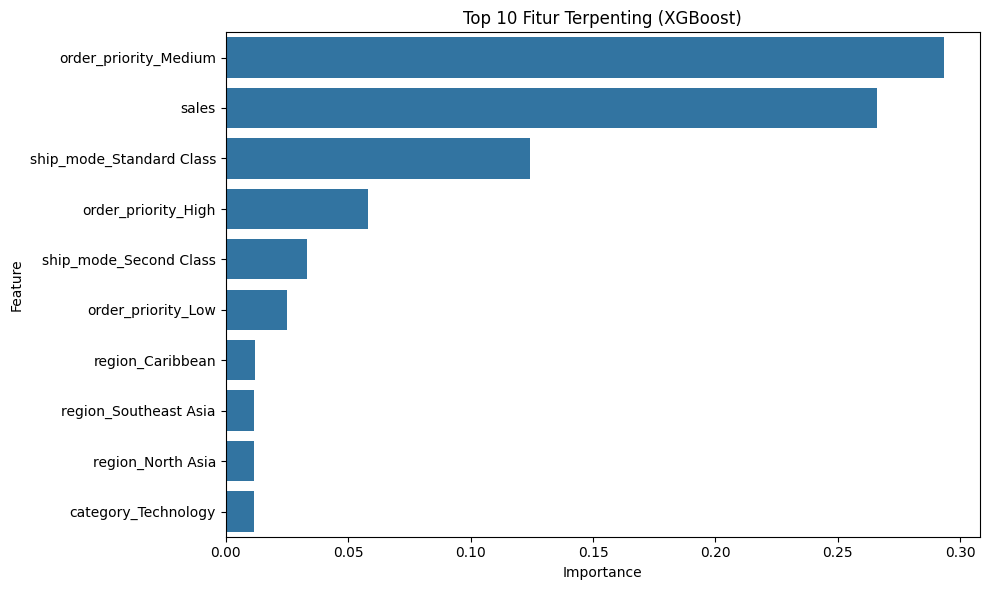

In [53]:
xgb_model = models["XGBoost"]
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Pastikan panjangnya cocok
assert len(importances) == len(feature_names)

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature')
plt.title('Top 10 Fitur Terpenting (XGBoost)')
plt.tight_layout()
plt.show()

In [54]:
feat_imp

,Feature,Importance
18,order_priority_Medium,0.293354
24,sales,0.265947
21,ship_mode_Standard Class,0.124303
16,order_priority_High,0.058060
20,ship_mode_Second Class,0.033343
17,order_priority_Low,0.025021
1,region_Caribbean,0.012020
10,region_Southeast Asia,0.011764
7,region_North Asia,0.011688
13,category_Technology,0.011512


## Order Priority

### Chi Squared

In [56]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

# panggil data
df = pd.read_csv("SuperStore_Orders.csv", encoding='ISO-8859-1')

# Hapus koma dan ubah ke float
df['sales'] = df['sales'].str.replace(',', '').astype(float)

# mengelompokkan variabel numerik menjadi interval berdasarkan quantil

# mengelompokkan discount menjadi interval dengan bins
bins = [0, 0.35, 0.65, 1.0]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['discount_interval'] = pd.cut(df['discount'], bins=bins, labels=labels, include_lowest=True)

# Mengelompokkan sales dan quantity menjadi interval berdasarkan quanti
df['sales_interval'] = pd.qcut(df['sales'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
df['quantity_interval'] = pd.qcut(df['quantity'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])
df['shippingcost_interval'] = pd.qcut(df['shipping_cost'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,quantity,discount,profit,shipping_cost,order_priority,year,discount_interval,sales_interval,quantity_interval,shippingcost_interval
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,2,0.0,106.1400,35.46,Medium,2011,Rendah,Sangat Tinggi,Rendah,Sangat Tinggi
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,3,0.1,36.0360,9.72,Medium,2011,Rendah,Tinggi,Sedang,Tinggi
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,4,0.0,29.6400,8.17,High,2011,Rendah,Sedang,Sedang,Tinggi
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,3,0.5,-26.0550,4.82,High,2011,Sedang,Sedang,Sedang,Sedang
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,5,0.1,37.7700,4.70,Medium,2011,Rendah,Tinggi,Tinggi,Sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,2,0.2,4.5188,0.89,Medium,2014,Rendah,Rendah,Rendah,Rendah
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,1,0.0,0.4200,0.49,Medium,2014,Rendah,Rendah,Rendah,Rendah
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,3,0.0,12.3600,0.35,Medium,2014,Rendah,Rendah,Sedang,Rendah
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,1,0.0,0.5600,0.20,Medium,2014,Rendah,Rendah,Rendah,Rendah


In [57]:
# Fungsi lengkap dengan nilai Chi-Square hitung dan tabel
def chi_square_full(col1, col2, df, alpha=0.05):
    # Buat tabel kontingensi
    ct = pd.crosstab(df[col1], df[col2])

    # Uji Chi-Square
    chi2_stat, p_val, dof, expected = chi2_contingency(ct)
    chi2_critical = chi2.ppf(1 - alpha, df=dof)

    # Cetak hasil
    print(f"\n======= {col1} vs {col2} =======")
    print("Contingency Table:")
    print(ct)
    print(f"\nChi-Squared Hitung : {chi2_stat:.4f}")
    print(f"Chi-Squared Tabel  : {chi2_critical:.4f} (α = {alpha}, df = {dof})")
    print(f"p-value            : {p_val:.4f}")

    if chi2_stat > chi2_critical:
        print("❗ Tolak H0 → Ada hubungan signifikan antara variabel.")
    else:
        print("✅ Gagal Tolak H0 → Tidak cukup bukti ada hubungan.")

    return ct, chi2_stat, chi2_critical, p_val

# List variabel target yang ingin diuji terhadap 'Order Priority'
target_columns = [
    'ship_mode',
    'segment',
    'region',
    'category',
    'discount_interval',
    'sales_interval',
    'quantity_interval',
    'shippingcost_interval'
]

# Looping seluruh uji
for col in target_columns:
    chi_square_full('order_priority', col, df)



======= order_priority vs ship_mode =======
Contingency Table:
ship_mode       First Class  Same Day  Second Class  Standard Class
order_priority                                                     
Critical               1734       742          1456               0
High                   3413      1269          4010            6809
Low                       0         0             0            2424
Medium                 2358       690          4843           21542

Chi-Squared Hitung : 12411.0793
Chi-Squared Tabel  : 16.9190 (α = 0.05, df = 9)
p-value            : 0.0000
❗ Tolak H0 → Ada hubungan signifikan antara variabel.

======= order_priority vs segment =======
Contingency Table:
segment         Consumer  Corporate  Home Office
order_priority                                  
Critical            2071       1185          676
High                8257       4431         2813
Low                 1173        744          507
Medium             15017       9069         5347

Chi-Squa

### Machine Learning

In [58]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

# panggil data
df = pd.read_csv("SuperStore_Orders.csv", encoding='ISO-8859-1')

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Hapus koma dan ubah ke float untuk kolom sales
df['sales'] = df['sales'].str.replace(',', '').astype(float)


# Fitur kategorik saja
fitur_kategorik = ['ship_mode', 'region', 'category', 'segment']

# Fitur numerik
fitur_numerik = ['sales', 'discount', 'quantity', 'shipping_cost']

# Target
target = 'order_priority'

# One-hot encoding untuk fitur kategorik
X_kategorik = pd.get_dummies(df[fitur_kategorik], drop_first=True)

# Gabungkan dengan fitur numerik
X_encoded = pd.concat([X_kategorik, df[fitur_numerik]], axis=1)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df[target])

# Tangani missing values jika ada
X_encoded = X_encoded.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)



In [60]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [61]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')

    print(f"\n{name}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"F1 Macro   : {f1_macro:.4f}")
    print(classification_report(y_test, y_pred))

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Macro': f1_macro
    })

# Buat DataFrame hasil evaluasi
df_results = pd.DataFrame(results).sort_values(by='F1 Macro', ascending=False)
print("\n=== Ringkasan Hasil Evaluasi ===")
print(df_results)


c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:134


Logistic Regression
Accuracy   : 0.6387
F1 Macro   : 0.3609
              precision    recall  f1-score   support

           0       0.73      0.16      0.26       786
           1       0.50      0.35      0.41      3100
           2       0.00      0.00      0.00       485
           3       0.67      0.91      0.77      5887

    accuracy                           0.64     10258
   macro avg       0.48      0.35      0.36     10258
weighted avg       0.60      0.64      0.59     10258


Decision Tree
Accuracy   : 0.6202
F1 Macro   : 0.4708
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       786
           1       0.47      0.47      0.47      3100
           2       0.15      0.16      0.16       485
           3       0.76      0.75      0.76      5887

    accuracy                           0.62     10258
   macro avg       0.47      0.47      0.47     10258
weighted avg       0.62      0.62      0.62     10258


Random Forest

c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:32:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
Accuracy   : 0.7284
F1 Macro   : 0.5218
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       786
           1       0.59      0.61      0.60      3100
           2       0.27      0.02      0.03       485
           3       0.80      0.87      0.84      5887

    accuracy                           0.73     10258
   macro avg       0.59      0.51      0.52     10258
weighted avg       0.70      0.73      0.71     10258


=== Ringkasan Hasil Evaluasi ===
                 Model  Accuracy  F1 Macro
3              XGBoost  0.728407  0.521775
1        Decision Tree  0.620199  0.470844
2        Random Forest  0.679860  0.467054
0  Logistic Regression  0.638721  0.360942


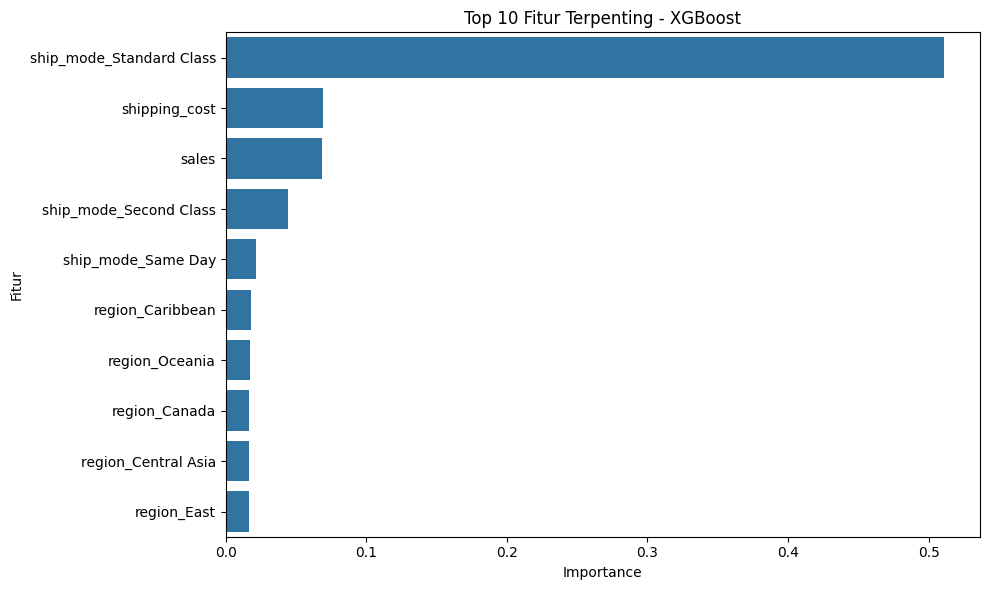

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importances = model.feature_importances_
features = X_train.columns

feat_imp = pd.DataFrame({
    'Fitur': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Fitur')
plt.title('Top 10 Fitur Terpenting - XGBoost')
plt.tight_layout()
plt.show()


In [63]:
feat_imp

,Fitur,Importance
2,ship_mode_Standard Class,0.510956
22,shipping_cost,0.069490
19,sales,0.068591
1,ship_mode_Second Class,0.044497
0,ship_mode_Same Day,0.021604
4,region_Caribbean,0.017997
11,region_Oceania,0.017426
3,region_Canada,0.016855
6,region_Central Asia,0.016738
8,region_East,0.016701
